# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras
import itertools

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape, y_train.shape

((50000, 3072), (50000, 10))

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [0.01, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
optimizers = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr, optimizer in itertools.product(LEARNING_RATE, optimizers):
    keras.backend.clear_session# 把舊的 Graph 清掉
    print(f"le:{lr} optimizer:{optimizer}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    opt = optimizer(lr=lr)
    model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-lr:%s-opt:%s" % (str(lr), str(opt).split('.')[-1].split(' ')[0])
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}    


le:0.01 optimizer:<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [===========

196/196 [==============================] - 2s 11ms/step - loss: 1.2353 - accuracy: 0.5655 - val_loss: 1.3917 - val_accuracy: 0.4978
le:0.01 optimizer:<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,

196/196 [==============================] - 3s 15ms/step - loss: 1.7979 - accuracy: 0.3435 - val_loss: 1.8585 - val_accuracy: 0.3240
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.7910 - accuracy: 0.3458 - val_loss: 1.8251 - val_accuracy: 0.3315
le:0.01 optimizer:<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________

196/196 [==============================] - 3s 14ms/step - loss: 1.0378 - accuracy: 0.6388 - val_loss: 1.4812 - val_accuracy: 0.5002
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0282 - accuracy: 0.6440 - val_loss: 1.3585 - val_accuracy: 0.5304
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0167 - accuracy: 0.6445 - val_loss: 1.5352 - val_accuracy: 0.4756
le:0.01 optimizer:<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________________________

196/196 [==============================] - 2s 12ms/step - loss: 1.5290 - accuracy: 0.4500 - val_loss: 1.5916 - val_accuracy: 0.4289
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5320 - accuracy: 0.4510 - val_loss: 1.6366 - val_accuracy: 0.4122
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5229 - accuracy: 0.4534 - val_loss: 1.5858 - val_accuracy: 0.4338
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5228 - accuracy: 0.4534 - val_loss: 1.6179 - val_accuracy: 0.4189
le:0.001 optimizer:<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
__

196/196 [==============================] - 2s 11ms/step - loss: 1.6995 - accuracy: 0.4088 - val_loss: 1.7003 - val_accuracy: 0.4076
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6961 - accuracy: 0.4083 - val_loss: 1.6979 - val_accuracy: 0.4096
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6927 - accuracy: 0.4099 - val_loss: 1.6945 - val_accuracy: 0.4111
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6894 - accuracy: 0.4111 - val_loss: 1.6923 - val_accuracy: 0.4079
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6862 - accuracy: 0.4126 - val_loss: 1.6896 - val_accuracy: 0.4093
le:0.001 optimizer:<class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3072)]            0     

196/196 [==============================] - 3s 15ms/step - loss: 0.8132 - accuracy: 0.7043 - val_loss: 1.8965 - val_accuracy: 0.4658
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8029 - accuracy: 0.7106 - val_loss: 2.0077 - val_accuracy: 0.4579
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7854 - accuracy: 0.7153 - val_loss: 1.8293 - val_accuracy: 0.4920
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7778 - accuracy: 0.7193 - val_loss: 1.9153 - val_accuracy: 0.4734
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7689 - accuracy: 0.7247 - val_loss: 2.1995 - val_accuracy: 0.4585
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7624 - accuracy: 0.7253 - val_loss: 1.8992 - val_accuracy: 0.4877
le:0.001 optimizer:<class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "model_6"
_________________________________________________

196/196 [==============================] - 2s 12ms/step - loss: 1.5315 - accuracy: 0.4672 - val_loss: 1.5522 - val_accuracy: 0.4577
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5275 - accuracy: 0.4701 - val_loss: 1.5583 - val_accuracy: 0.4546
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5236 - accuracy: 0.4710 - val_loss: 1.5530 - val_accuracy: 0.4574
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5197 - accuracy: 0.4718 - val_loss: 1.5480 - val_accuracy: 0.4555
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5160 - accuracy: 0.4737 - val_loss: 1.5543 - val_accuracy: 0.4494
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5127 - accuracy: 0.4737 - val_loss: 1.5443 - val_accuracy: 0.4586
Epoch 50/50
196/196 [==============================] - 2s 13ms/step - loss: 1.5092 - accuracy: 0.4756 - val_loss: 1.5404 - val_accuracy: 0.4582
le:0

196/196 [==============================] - 2s 12ms/step - loss: 0.7620 - accuracy: 0.7307 - val_loss: 1.6112 - val_accuracy: 0.5233
Epoch 44/50
196/196 [==============================] - 3s 13ms/step - loss: 0.7456 - accuracy: 0.7355 - val_loss: 1.6215 - val_accuracy: 0.5236
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7276 - accuracy: 0.7411 - val_loss: 1.6866 - val_accuracy: 0.5203
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7321 - accuracy: 0.7379 - val_loss: 1.6715 - val_accuracy: 0.5223
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7072 - accuracy: 0.7475 - val_loss: 1.6709 - val_accuracy: 0.5200
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6915 - accuracy: 0.7535 - val_loss: 1.6673 - val_accuracy: 0.5217
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6711 - accuracy: 0.7620 - val_loss: 1.7258 - val_accuracy: 0.5198
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 2.0783 - accuracy: 0.2788 - val_loss: 2.0757 - val_accuracy: 0.2873
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0747 - accuracy: 0.2797 - val_loss: 2.0722 - val_accuracy: 0.2894
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0712 - accuracy: 0.2815 - val_loss: 2.0686 - val_accuracy: 0.2911
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0676 - accuracy: 0.2826 - val_loss: 2.0651 - val_accuracy: 0.2922
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0641 - accuracy: 0.2842 - val_loss: 2.0617 - val_accuracy: 0.2937
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0607 - accuracy: 0.2843 - val_loss: 2.0583 - val_accuracy: 0.2955
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0572 - accuracy: 0.2862 - val_loss: 2.0549 - val_accuracy: 0.2963
Epoc

196/196 [==============================] - 3s 15ms/step - loss: 1.0391 - accuracy: 0.6389 - val_loss: 1.4179 - val_accuracy: 0.5081
Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0278 - accuracy: 0.6411 - val_loss: 1.4478 - val_accuracy: 0.4896
Epoch 43/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0153 - accuracy: 0.6485 - val_loss: 1.4419 - val_accuracy: 0.4982
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 1.0076 - accuracy: 0.6511 - val_loss: 1.3858 - val_accuracy: 0.5214
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9982 - accuracy: 0.6532 - val_loss: 1.4731 - val_accuracy: 0.5080
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9879 - accuracy: 0.6579 - val_loss: 1.3818 - val_accuracy: 0.5258
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9779 - accuracy: 0.6611 - val_loss: 1.5080 - val_accuracy: 0.4995
Epoc

196/196 [==============================] - 2s 13ms/step - loss: 1.8807 - accuracy: 0.3497 - val_loss: 1.8793 - val_accuracy: 0.3511
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8775 - accuracy: 0.3515 - val_loss: 1.8760 - val_accuracy: 0.3542
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8742 - accuracy: 0.3521 - val_loss: 1.8731 - val_accuracy: 0.3564
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8713 - accuracy: 0.3537 - val_loss: 1.8699 - val_accuracy: 0.3556
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8682 - accuracy: 0.3542 - val_loss: 1.8669 - val_accuracy: 0.3565
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8653 - accuracy: 0.3548 - val_loss: 1.8641 - val_accuracy: 0.3568
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.8624 - accuracy: 0.3564 - val_loss: 1.8614 - val_accuracy: 0.3590
Epoc

196/196 [==============================] - 2s 13ms/step - loss: 0.9295 - accuracy: 0.6782 - val_loss: 1.3067 - val_accuracy: 0.5542
Epoch 40/50
196/196 [==============================] - 3s 13ms/step - loss: 0.9167 - accuracy: 0.6827 - val_loss: 1.3278 - val_accuracy: 0.5452
Epoch 41/50
196/196 [==============================] - 3s 13ms/step - loss: 0.9057 - accuracy: 0.6861 - val_loss: 1.3362 - val_accuracy: 0.5433
Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 0.9016 - accuracy: 0.6875 - val_loss: 1.4131 - val_accuracy: 0.5164
Epoch 43/50
196/196 [==============================] - 3s 13ms/step - loss: 0.8938 - accuracy: 0.6907 - val_loss: 1.3409 - val_accuracy: 0.5463
Epoch 44/50
196/196 [==============================] - 2s 13ms/step - loss: 0.8755 - accuracy: 0.6968 - val_loss: 1.3607 - val_accuracy: 0.5357
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8551 - accuracy: 0.7056 - val_loss: 1.3522 - val_accuracy: 0.5453
Epoc

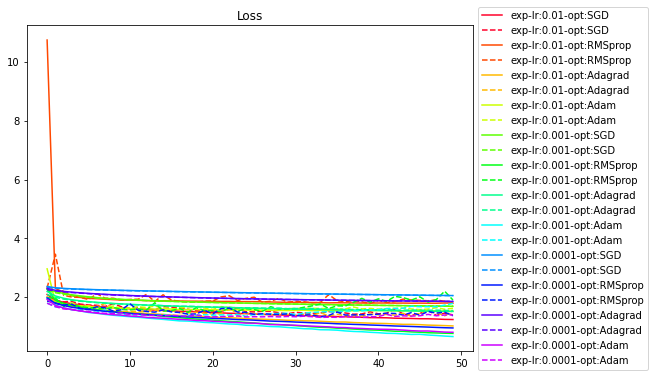

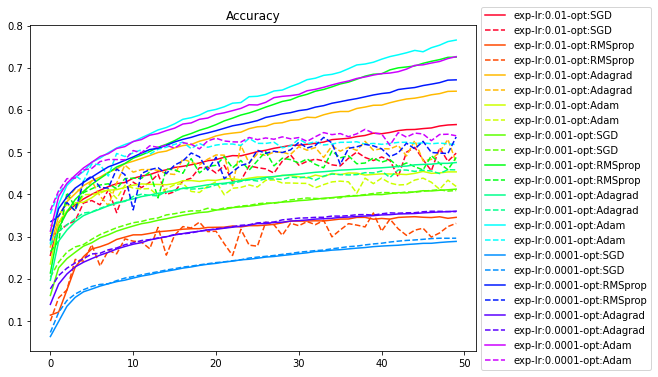

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()